In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
f"../Sorting/FINALRD/{centrality}/{dataset}/FINAL/saved_fit_config{config_numbers[1]-3}_{i}.npy"

'../Sorting/FINALRD/close/CA-GrQc/FINAL/saved_fit_config2_2.npy'

In [21]:
dataset = "Blogs"
#centrality = "degree"


config_numbers = [1, 4, 1]

configurations = [4, 3, 1]

centrality = "comm"


saved_fits_1 = [np.load(f"./FINALRD/{dataset}/FINAL/saved_fit_config{config_numbers[0]}_{i}.npy") for i in range(0, 5)]

if config_numbers[1]<3:
    saved_fits_2 = [np.load(f"../Sorting/FINALRD_with_uniform/{centrality}/{dataset}/FINAL/saved_fit_config{config_numbers[1]}_{i}.npy") for i in range(0, 5)]
else:
    saved_fits_2 = [np.load(f"../Sorting/FINALRD/{centrality}/{dataset}/FINAL/saved_fit_config{config_numbers[1]-3}_{i}.npy") for i in range(0, 5)]

saved_fits_3 = [np.load(f"../Mutation/FINALRD/{dataset}/FINAL/saved_fit_config{config_numbers[2]}_{i}.npy") for i in range(0, 5)]


#saved_fits_4 = [np.load(f"../Sorting/FINALRD/{centrality}/{dataset}/FINAL/saved_fit_config{config_numbers[3]-3}_{i}.npy") for i in range(0, 5)]

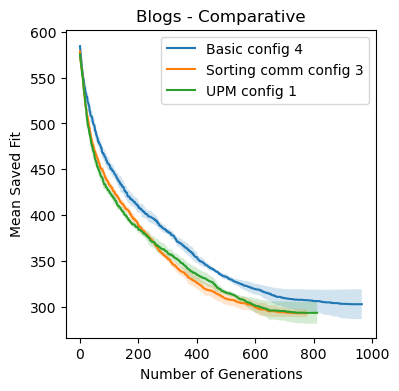

In [22]:
# Find the maximum length
max_length1 = max(len(arr) for arr in saved_fits_1)
max_length2 = max(len(arr) for arr in saved_fits_2)
max_length3 = max(len(arr) for arr in saved_fits_3)
#max_length4 = max(len(arr) for arr in saved_fits_4)

# Pad arrays with their final values
padded_saved_fits1 = [np.pad(arr, (0, max_length1 - len(arr)), 'constant', constant_values=(arr[-1])) for arr in saved_fits_1]
padded_saved_fits2 = [np.pad(arr, (0, max_length2 - len(arr)), 'constant', constant_values=(arr[-1])) for arr in saved_fits_2]
padded_saved_fits3 = [np.pad(arr, (0, max_length3 - len(arr)), 'constant', constant_values=(arr[-1])) for arr in saved_fits_3]
#padded_saved_fits4 = [np.pad(arr, (0, max_length4 - len(arr)), 'constant', constant_values=(arr[-1])) for arr in saved_fits_4]

# Calculate mean and standard deviation
mean_saved_fit1 = np.mean(padded_saved_fits1, axis=0)
mean_saved_fit2 = np.mean(padded_saved_fits2, axis=0)
mean_saved_fit3 = np.mean(padded_saved_fits3, axis=0)
#mean_saved_fit4 = np.mean(padded_saved_fits4, axis=0)

std_saved_fit1 = np.std(padded_saved_fits1, axis=0)
std_saved_fit2 = np.std(padded_saved_fits2, axis=0)
std_saved_fit3 = np.std(padded_saved_fits3, axis=0)
#std_saved_fit4 = np.std(padded_saved_fits4, axis=0)

plt.figure(figsize = (4,4))
# Plot mean lines
#plt.plot(saved_fits_0, label = 'Baseline (1,10)')
#plt.plot(saved_fits_1, label = 'Baseline (1,100)')

plt.plot(range(len(mean_saved_fit1)), mean_saved_fit1, label=f'Basic config {configurations[0]}')
plt.plot(range(len(mean_saved_fit2)), mean_saved_fit2, label=f'Sorting {centrality} config {configurations[1]}')
plt.plot(range(len(mean_saved_fit3)), mean_saved_fit3, label=f'UPM config {configurations[2]}')
#plt.plot(range(len(mean_saved_fit4)), mean_saved_fit4, label='Config 8')

#plt.plot(saved_fits_3, label='RW_RW')
#plt.plot(saved_fits_4, label='RW_TS')
#plt.plot(saved_fits_5, label='TS_RW')

# Plot shaded areas for standard deviation


plt.fill_between(range(len(mean_saved_fit1)), mean_saved_fit1 - std_saved_fit1, mean_saved_fit1 + std_saved_fit1, alpha=0.2)
plt.fill_between(range(len(mean_saved_fit2)), mean_saved_fit2 - std_saved_fit2, mean_saved_fit2 + std_saved_fit2, alpha=0.2)
plt.fill_between(range(len(mean_saved_fit3)), mean_saved_fit3 - std_saved_fit3, mean_saved_fit3 + std_saved_fit3, alpha=0.2)
#plt.fill_between(range(len(mean_saved_fit4)), mean_saved_fit4 - std_saved_fit4, mean_saved_fit4 + std_saved_fit4, alpha=0.2)

# Add labels and title
plt.xlabel('Number of Generations')
plt.ylabel('Mean Saved Fit')
plt.title(f'{dataset} - Comparative')
plt.suptitle('')
plt.legend()

plt.savefig(f'../{dataset} finalfinal.png', bbox_inches='tight')
# Show the plot
plt.show()

In [23]:
for i in range(3):
    saved_fits = globals()[f'saved_fits_{i+1}']
    for saved_fit in saved_fits:
        print(saved_fit[len(saved_fit)-1])

    print("----------")

306
329
280
293
305
----------
287
300
290
294
293
----------
315
296
287
287
281
----------


In [6]:
for i in range(3):
    saved_fits = globals()[f'saved_fits_{i+1}']
    for saved_fit in saved_fits:
        print(len(saved_fit))

    print("----------")

364
403
443
336
539
----------
423
383
390
415
580
----------
323
270
380
278
292
----------


In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from itertools import combinations
from collections import defaultdict
import time
from numba import njit
import community as community

#@njit(parallel=True)
def opt_n_m_anonymity_adj(adj_matrix):
    n_m_anonymity_dict = defaultdict(list)
    
    num_nodes = adj_matrix.shape[0]

    for node in range(num_nodes):
        # Step 1: Determine ego state (neighbors and edges)
        neighbors = np.nonzero(adj_matrix[node])[0]
        num_neighbors = len(neighbors)
        
        # Use Numpy operations for efficiency
        neighborhood_edges = int(np.count_nonzero(adj_matrix[neighbors][:, neighbors])/2)

        ego_state = (num_neighbors + 1, neighborhood_edges+num_neighbors)

        # Step 2: Count unique equivalence classes
        n_m_anonymity_dict[ego_state].append(node)

    number_unique = sum(1 for equivalence_class in n_m_anonymity_dict.values() if len(equivalence_class) == 1)

    return n_m_anonymity_dict, number_unique

# Function to calculate n-m-anonymity
def calculate_n_m_anonymity(graph, deleted_edges, edges_to_delete):
    # Create a copy of the graph to avoid modifying the original graph
    modified_graph = graph.copy()

    # Delete edges based on the binary string
    for edge, delete_flag in zip(edges_to_delete, deleted_edges):
        if delete_flag:
            modified_graph.remove_edge(*edge)

    # Calculate n-m-anonymity
    modified_graph_adj = nx.to_numpy_array(modified_graph).astype(int)
    _, fitness = opt_n_m_anonymity_adj(modified_graph_adj)

    return fitness

#dataset = "CA-GrQc"

if dataset == "CA-GrQc":
    mediumG = nx.read_edgelist(r"./../../CA-GrQc.txt")
elif dataset == "CollegeMsg":
    mediumG = nx.read_edgelist(r"./../../CollegeMsg_noTime.txt")
elif dataset == "Blogs":
    mediumG = nx.read_edgelist(r"./../../moreno_blogs.txt")

mediumG.remove_edges_from(nx.selfloop_edges(mediumG))

#config_numbers = [3,2,1]
for config_number in range(3):
    edge_del = []
    for i in range(5):  # Adjust range if you have more files
        # Construct the filename

        if config_number == 0:
            filename = f"./FINALRD/{dataset}/FINAL/population_config{config_numbers[0]}_{i}.npy"
        elif config_number ==1:
            if config_numbers[1]<3:
                filename = f"../Sorting/FINALRD_with_uniform/{centrality}/{dataset}/FINAL/population_config{config_numbers[1]}_{i}.npy"
            else:
                filename = f"../Sorting/FINALRD/{centrality}/{dataset}/FINAL/population_config{config_numbers[1]-3}_{i}.npy"
        else:            
            filename = f"../Mutation/FINALRD/{dataset}/FINAL/population_config{config_numbers[2]}_{i}.npy"
        
        # Load the data from the .npy file
        data = np.load(filename)
    
        unique_values = np.array([calculate_n_m_anonymity(mediumG, individual, mediumG.edges()) for individual in data])
        edges = np.array([sum(individual) for individual in data])
        
        min_value = np.min(unique_values)
    
        # Step 2: Find all indices where the unique_values are equal to the minimum value
        min_indices = np.where(unique_values == min_value)[0]
        
        # Step 3: Retrieve the corresponding edges
        min_edges = [edges[i] for i in min_indices]
        
        # Step 4: Find the minimum edge (assuming you want the lexicographically smallest edge)
        min_edge = min(min_edges)
        
        edge_del.append(min_edge)

        print(min_edge)
        
    print(edge_del)
    print("-----------")

526
461
542
537
541
[526, 461, 542, 537, 541]
-----------
755
743
694
705
776
[755, 743, 694, 705, 776]
-----------
771
786
798
781
777
[771, 786, 798, 781, 777]
-----------


In [25]:
i = 0
population = np.load(f"./FINALRD/{dataset}/FINAL/population_config{config_numbers[0]}_{i}.npy")

In [30]:
edges = np.array([sum(individual) for individual in data])
        
min_value = np.min(edges)

min_value

533

In [ ]:
dataset = "Blogs"

saved_fits_1 = [np.load(f"../Mutation/FINALRD/{dataset}/FINAL/saved_fit_config0_{i}.npy") for i in range(0, 5)]
saved_fits_2 = [np.load(f"../Mutation/FINALRD/{dataset}/FINAL/saved_fit_config1_{i}.npy") for i in range(0, 5)]
saved_fits_3 = [np.load(f"../Mutation/FINALRD/{dataset}/FINAL/saved_fit_config2_{i}.npy") for i in range(0, 5)]
#saved_fits_4 = [np.load(f"./FINALRD/{dataset}/FINAL/saved_fit_config3_{i}.npy") for i in range(0, 5)]

In [ ]:
max_length1 = max(len(arr) for arr in saved_fits_1)
max_length2 = max(len(arr) for arr in saved_fits_2)
max_length3 = max(len(arr) for arr in saved_fits_3)
#max_length4 = max(len(arr) for arr in saved_fits_4)

# Pad arrays with their final values
padded_saved_fits1 = [np.pad(arr, (0, max_length1 - len(arr)), 'constant', constant_values=(arr[-1])) for arr in saved_fits_1]
padded_saved_fits2 = [np.pad(arr, (0, max_length2 - len(arr)), 'constant', constant_values=(arr[-1])) for arr in saved_fits_2]
padded_saved_fits3 = [np.pad(arr, (0, max_length3 - len(arr)), 'constant', constant_values=(arr[-1])) for arr in saved_fits_3]
#padded_saved_fits4 = [np.pad(arr, (0, max_length4 - len(arr)), 'constant', constant_values=(arr[-1])) for arr in saved_fits_4]

# Calculate mean and standard deviation
mean_saved_fit1 = np.mean(padded_saved_fits1, axis=0)
mean_saved_fit2 = np.mean(padded_saved_fits2, axis=0)
mean_saved_fit3 = np.mean(padded_saved_fits3, axis=0)
#mean_saved_fit4 = np.mean(padded_saved_fits4, axis=0)

std_saved_fit1 = np.std(padded_saved_fits1, axis=0)
std_saved_fit2 = np.std(padded_saved_fits2, axis=0)
std_saved_fit3 = np.std(padded_saved_fits3, axis=0)
#std_saved_fit4 = np.std(padded_saved_fits4, axis=0)

plt.figure(figsize = (4,4))
# Plot mean lines
#plt.plot(saved_fits_0, label = 'Baseline (1,10)')
#plt.plot(saved_fits_1, label = 'Baseline (1,100)')

plt.plot(range(len(mean_saved_fit1)), mean_saved_fit1, label='Config 2')
plt.plot(range(len(mean_saved_fit2)), mean_saved_fit2, label='Config 1')
plt.plot(range(len(mean_saved_fit3)), mean_saved_fit3, label='Config 6')
#plt.plot(range(len(mean_saved_fit4)), mean_saved_fit4, label='Config 4')

#plt.plot(saved_fits_3, label='RW_RW')
#plt.plot(saved_fits_4, label='RW_TS')
#plt.plot(saved_fits_5, label='TS_RW')

# Plot shaded areas for standard deviation


plt.fill_between(range(len(mean_saved_fit1)), mean_saved_fit1 - std_saved_fit1, mean_saved_fit1 + std_saved_fit1, alpha=0.2)
plt.fill_between(range(len(mean_saved_fit2)), mean_saved_fit2 - std_saved_fit2, mean_saved_fit2 + std_saved_fit2, alpha=0.2)
plt.fill_between(range(len(mean_saved_fit3)), mean_saved_fit3 - std_saved_fit3, mean_saved_fit3 + std_saved_fit3, alpha=0.2)
#plt.fill_between(range(len(mean_saved_fit4)), mean_saved_fit4 - std_saved_fit4, mean_saved_fit4 + std_saved_fit4, alpha=0.2)

# Add labels and title
plt.xlabel('Number of Generations')
plt.ylabel('Mean Saved Fit')
plt.title(f'{dataset} - Mean Saved Fit with Std Dev')
plt.suptitle('')
plt.legend()

#plt.savefig(f'../Mutation/{dataset} finalfinal.png', bbox_inches='tight')
# Show the plot
plt.show()